In [2]:
# Cargar librerias necesarias

In [118]:
from google.colab import drive
drive.mount('content/')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.express import scatter
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, RocCurveDisplay, classification_report, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.preprocessing import OneHotEncoder
!pip install category_encoders
from sklearn.linear_model import LinearRegression




Drive already mounted at content/; to attempt to forcibly remount, call drive.mount("content/", force_remount=True).


# Extract

In [4]:
# Dataset sales_predictions.csv
# Extraer datos al dataFrame

df = pd.read_csv('/content/content/MyDrive/Colab Notebooks/Machine learning/DATASETS/sales_predictions_2023.csv')
df.head(15)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


-EXISTEN VALORES NULOS QUE SON MAYOR AL 60% DE LOS VALORES DE LA COLUMNA

**-LA COLUMNA Item_Visibility, CONTIENE VALORES ATIPICOS, O SEA 0**


1.   Procederemos a convertir los "0" a Nan.
2.   Luego, realizamos imputacion simple para completar los datos al valor promedio.
3. Si existen diferentes cifras decimales, procederemos a igualaslas al resto de la columna.





In [5]:
df['Item_Visibility'].replace(0, np.nan, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            7997 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df[['Item_Weight', 'Item_Visibility']].isna().sum()

Item_Weight        1463
Item_Visibility     526
dtype: int64

In [8]:
imputer_column = SimpleImputer(strategy= 'mean')
df[['Item_Weight', 'Item_Visibility']] = imputer_column.fit_transform(df[['Item_Weight', 'Item_Visibility']])

In [9]:
df.head(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.070482,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [10]:
imputer_Item_Visibility = SimpleImputer(strategy='mean')
df['Item_Visibility'] = imputer_Item_Visibility.fit_transform(df[['Item_Visibility']])

In [11]:
df['Item_Weight'] = df['Item_Weight'].round(2)
df['Item_Visibility'] = df['Item_Visibility'].round(9)

In [12]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
# Idenfique valores duplicados

df.duplicated().sum()


0

-NO EXISTEN FILAS DUPLICADAS EN EL DATAFRAME

1-IDENTIFICAMOS LAS COLUMNAS CON VALORES PARECIDOS, PARA POSTERIORMENTE HOMOLOGARLOS.

In [14]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [15]:
# Crear una funcion para normalizar los datos, por ejemplo:
# En la columna Item_Fat_Content el valor "LF" es igual a Low Fat, se debe homologar a "Low Fat"

df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                'low fat':'Low Fat',
                                'reg':'Regular'},
                               inplace=True)


In [16]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)


**IMPUTACION DE LOS DATOS FALTANTES CATEGORICOS:**

In [17]:
print(df.isna().sum().sum(), 'Missing values')

2410 Missing values


In [18]:
print(df.isna().sum())

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [19]:
imputer_size = SimpleImputer(strategy= 'most_frequent')
df[['Outlet_Size']] = imputer_size.fit_transform(df[['Outlet_Size']])

In [20]:
print(df.isna().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


# Load

In [21]:
df.to_csv('/content/content/MyDrive/Colab Notebooks/Machine learning/Tareas terminadas/Tarea_terminada_sales_predictions_2023_new.csv', index=True)



---



In [22]:
# Haga un analisis de sus datos y grafique con los graficos que entienda sea mas factible para tu analisis

# **Analisis 1: Ventas de un producto vs el espacio que ocupa en la tienda.**

Segun el grafico, nos damos cuenta que mientras menos expuesto esta al publico un producto, mas se vente.

podemos ver que los puntos se acercan mas a la izquierda, indicando que ocupan menos espacio y mientras mas altos estan, mayor cantidad de productos se venden.



In [23]:
fig = scatter(df, x="Item_Visibility", y="Item_Outlet_Sales",
              title="Insidencia en las ventas en funcion de la visivilidad")
fig.update_traces(marker=dict(line=dict(color='white', width=0.5)))

fig.update_layout(
    xaxis_title="Visivilidad del producto: (%)",
    yaxis_title="Unidades vendidas en la tienda",
)

fig.show()


# **Analisis 2: Insidencia en las ventas en funcion del tipo de producto y el contenido de grasa.**

En esta comparacion, podemos ver las ventas que se realizaron de cada tipo de producto, en comparacion con el contenido de grasa del producto.

Podemos visualizar que los productos bajos en grasa, se comercializan mas que los regulares.







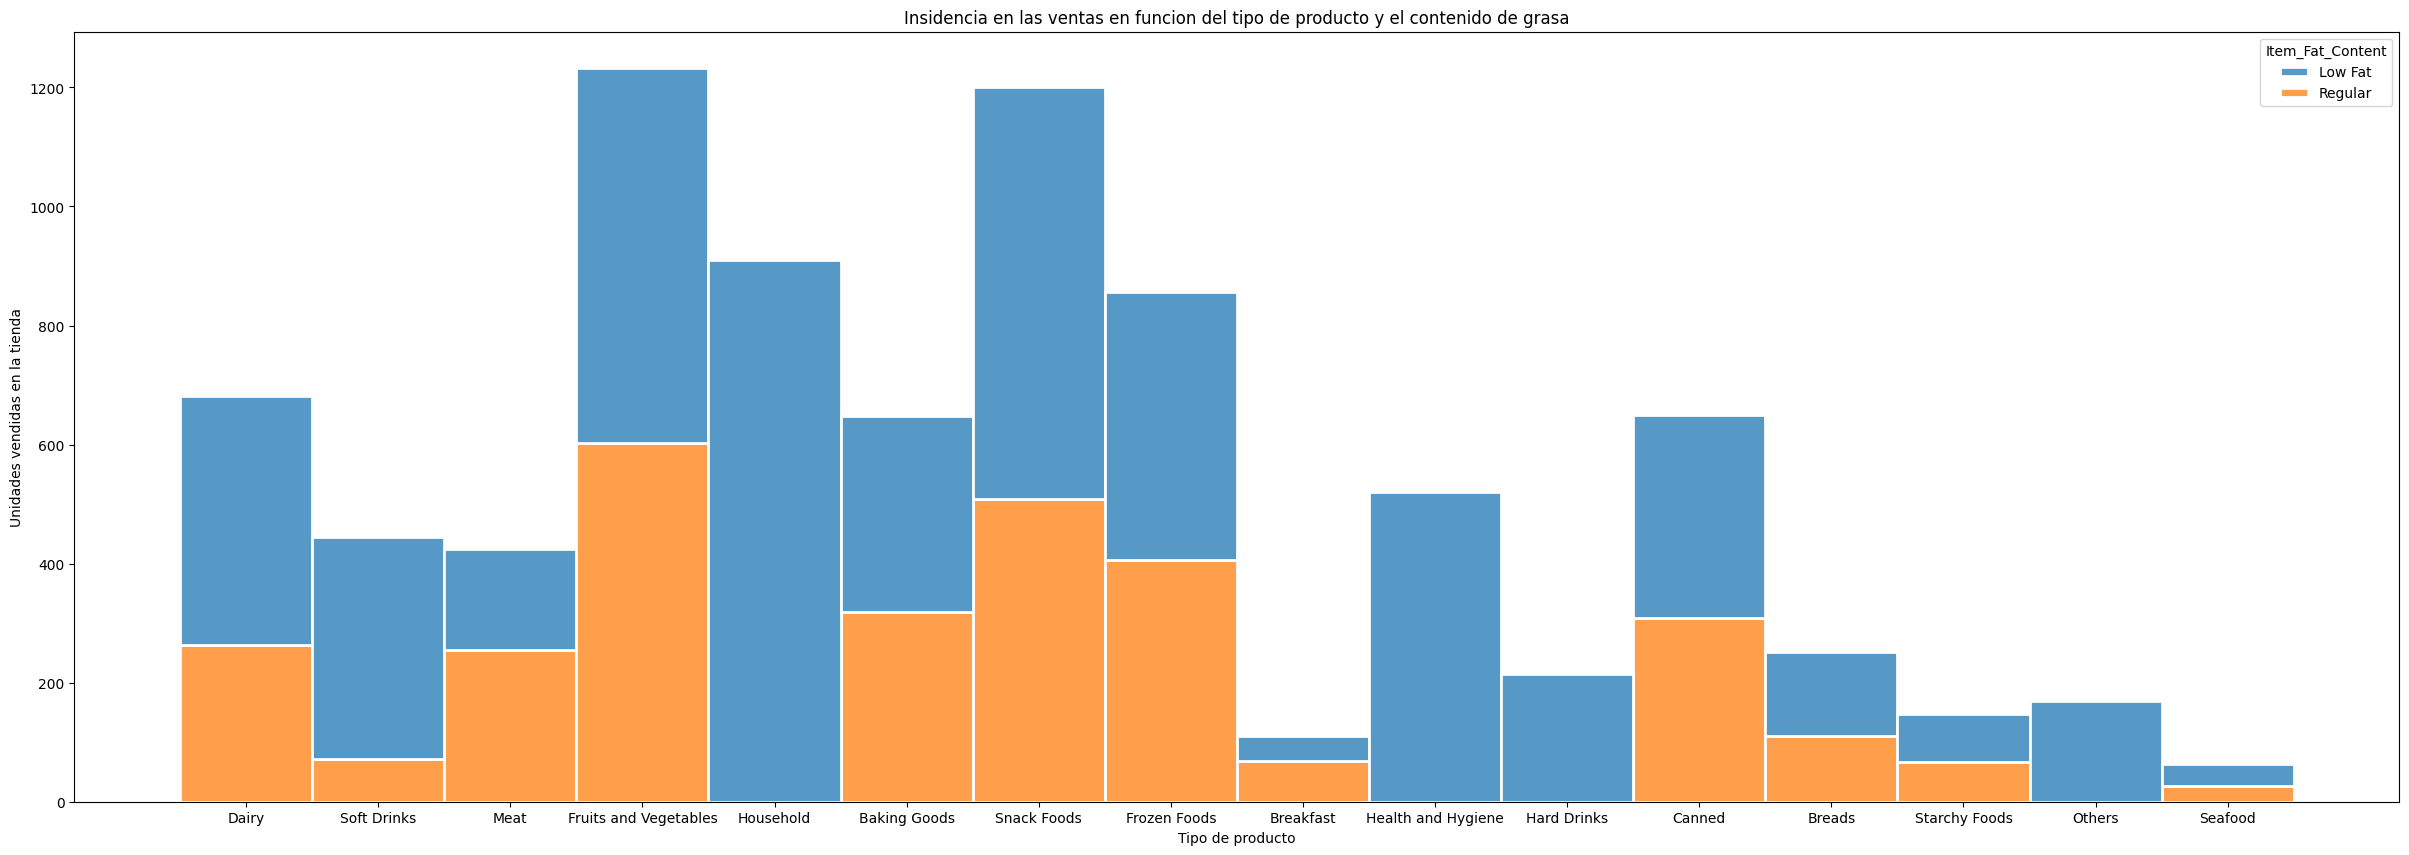

In [24]:
plt.figure(figsize=(30, 10))
sns.histplot(data=df, x="Item_Type", hue="Item_Fat_Content", multiple="stack", linewidth=2, edgecolor='white', shrink = 1)
plt.xlabel('Tipo de producto')
plt.ylabel('Unidades vendidas en la tienda')
plt.title('Insidencia en las ventas en funcion del tipo de producto y el contenido de grasa')
plt.show()

In [25]:
import plotly.express as px

fig = px.histogram(df, x="Item_Type", color="Item_Fat_Content",
                  nbins=15, opacity=0.8, barmode="group")
fig.update_layout(
    title="Insidencia en las ventas en funcion del tipo de producto y el contenido de grasa",
    xaxis_title="Tipo de producto",
    yaxis_title="Unidades vendidas en la tienda")
fig.show()


# **Analisis 3: Insidencia del peso del producto y el tipo de producto.**

En esta comparacion, podemos ver las ventas que se realizaron de cada producto en relacion con su peso.


In [26]:
fig = scatter(df, x="Item_Weight", y="Item_Outlet_Sales",
              title="Insidencia en las ventas en funcion de la visivilidad")
fig.update_traces(marker=dict(line=dict(color='white', width=0.5)))

fig.update_layout(
    xaxis_title="Peso del producto",
    yaxis_title="Unidades vendidas en la tienda",
)

fig.show()


# **Analisis 4: Dispersion de las ventas.**

En este grafico, podemos ver la dispercion de las ventas del producto. Aunque hubo unas muy buenas ventas, el promedio se mantuvo aproximadamente entre 1000 y 3000. Esto permite que el negocio pueda contar mensualmente con estos ingresos estables y tener disponibilidad en inventario de dichos productos.

Sin embargo, en muy pocos casos superaron a la barrera de los 6000 de forma estable y en algunos casos a los 12000.


<ipython-input-48-bf74d4b122ab>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




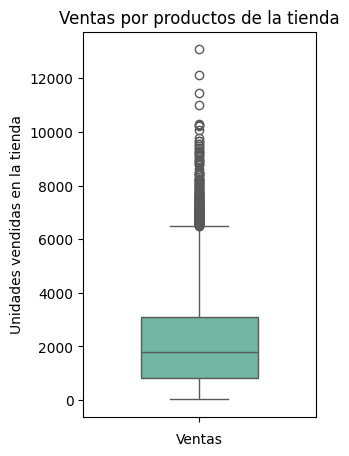

In [48]:
plt.figure(figsize=(3, 5))
sns.boxplot(y="Item_Outlet_Sales", data=df, palette="Set2", width= 0.5, )
plt.xlabel('Ventas')
plt.ylabel('Unidades vendidas en la tienda')
plt.title("Ventas por productos de la tienda")
plt.show()

# Aprendizaje supervisado - Regression Model

BigMart Sales Prediction practice problem

**Dataset dictionary**:

El objetivo de este ejercicio es predecir el precio de venta de cada Item, para entender que tambien el modelo se ha entrenado recuerde usar las metricas aprendidas en clases pasadas.


Item_Identifier: Unique product ID


Item_Weight: Weight of product


Item_Fat_Content: Whether the product is low fat or not


Item_Visibility: The % of total display area of all products in a store allocated to the particular product


Item_Type: The category to which the product belongs


Item_MRP: Maximum Retail Price (list price) of the product


Outlet_Identifier: Unique store ID


Outlet_Establishment_Year: The year in which store was established


Outlet_Size: The size of the store in terms of ground area covered


Outlet_Location_Type: The type of city in which the store is located


Outlet_Type: Whether the outlet is just a grocery store or some sort of
supermarket


Item_Outlet_Sales: Sales of the product in the particulat store. This is the
outcome variable to be predicted.

**Utilize el modelo de regresion de su eleccion.**

In [ ]:
!pip install category-encoders
from sklearn.preprocessing import OneHotEncoder  # Importar de sklearn
from category_encoders import OneHotEncoder

Haciendo las transformaciones en las columnas categoricas

In [71]:
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df)
df_encoded = pd.DataFrame(encoded_features,columns=encoder.get_feature_names())

/usr/local/lib/python3.10/dist-packages/category_encoders/utils.py:366: FutureWarning:

`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.



In [78]:
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

In [79]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   float64
 5   Item_Fat_Content_Low Fat         8523 non-null   bool   
 6   Item_Fat_Content_Regular         8523 non-null   bool   
 7   Item_Type_Baking Goods           8523 non-null   bool   
 8   Item_Type_Breads                 8523 non-null   bool   
 9   Item_Type_Breakfast              8523 non-null   bool   
 10  Item_Type_Canned                 8523 non-null   bool   
 11  Item_Type_Dairy                  8523 non-null   bool   
 12  Item_Type_Frozen Foo

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,True,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,True,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.070482,182.0950,1998,732.3800,False,True,False,False,False,...,False,True,False,False,False,True,True,False,False,False
4,8.93,0.070482,53.8614,1987,994.7052,True,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False


Divida la data de prueba y entrenamiento

In [91]:
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

X.columns = [None] * len(X .columns)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6818, 32)
(1705, 32)
(6818,)
(1705,)


In [119]:
std_regresion = StandardScaler()

rlm = LinearRegression()

pipe_regression = make_pipeline(std_regresion,rlm)

pipe_regression.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [120]:
train_score = pipe_regression.score(X_train,y_train)
print("Score modelo de regresion para el conjunto de entrenamiento:", train_score)
test_score = pipe_regression.score(X_test,y_test)
print("Score modelo de regresion para el conjunto de prueba:", test_score)

Score modelo de regresion para el conjunto de entrenamiento: 0.5589546538268695
Score modelo de regresion para el conjunto de prueba: 0.5798805068992312


In [121]:
y_pred = pipe_regression.predict(X_test)
print("Prediccion para el conjunto de prueba:",y_pred)

Prediccion para el conjunto de prueba: [1357.70640765  765.83140765  818.01890765 ...  847.95640765  572.89390765
 1714.76890765]
